In [60]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv(r"C:\Users\shijun.ma\OneDrive - Accenture\Documents\Datathon\diabetes_analytics\diabetes_data.csv")

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
sns.set(style='whitegrid')

In [22]:
df.columns

Index(['gender', 'age', 'hypertension', 'diabetes_pedigree_function',
       'diet_type', 'star_sign', 'BMI', 'weight', 'family_diabetes_history',
       'social_media_usage', 'physical_activity_level', 'sleep_duration',
       'stress_level', 'pregnancies', 'alcohol_consumption', 'diabetes'],
      dtype='object')

### Distribution of the data fields

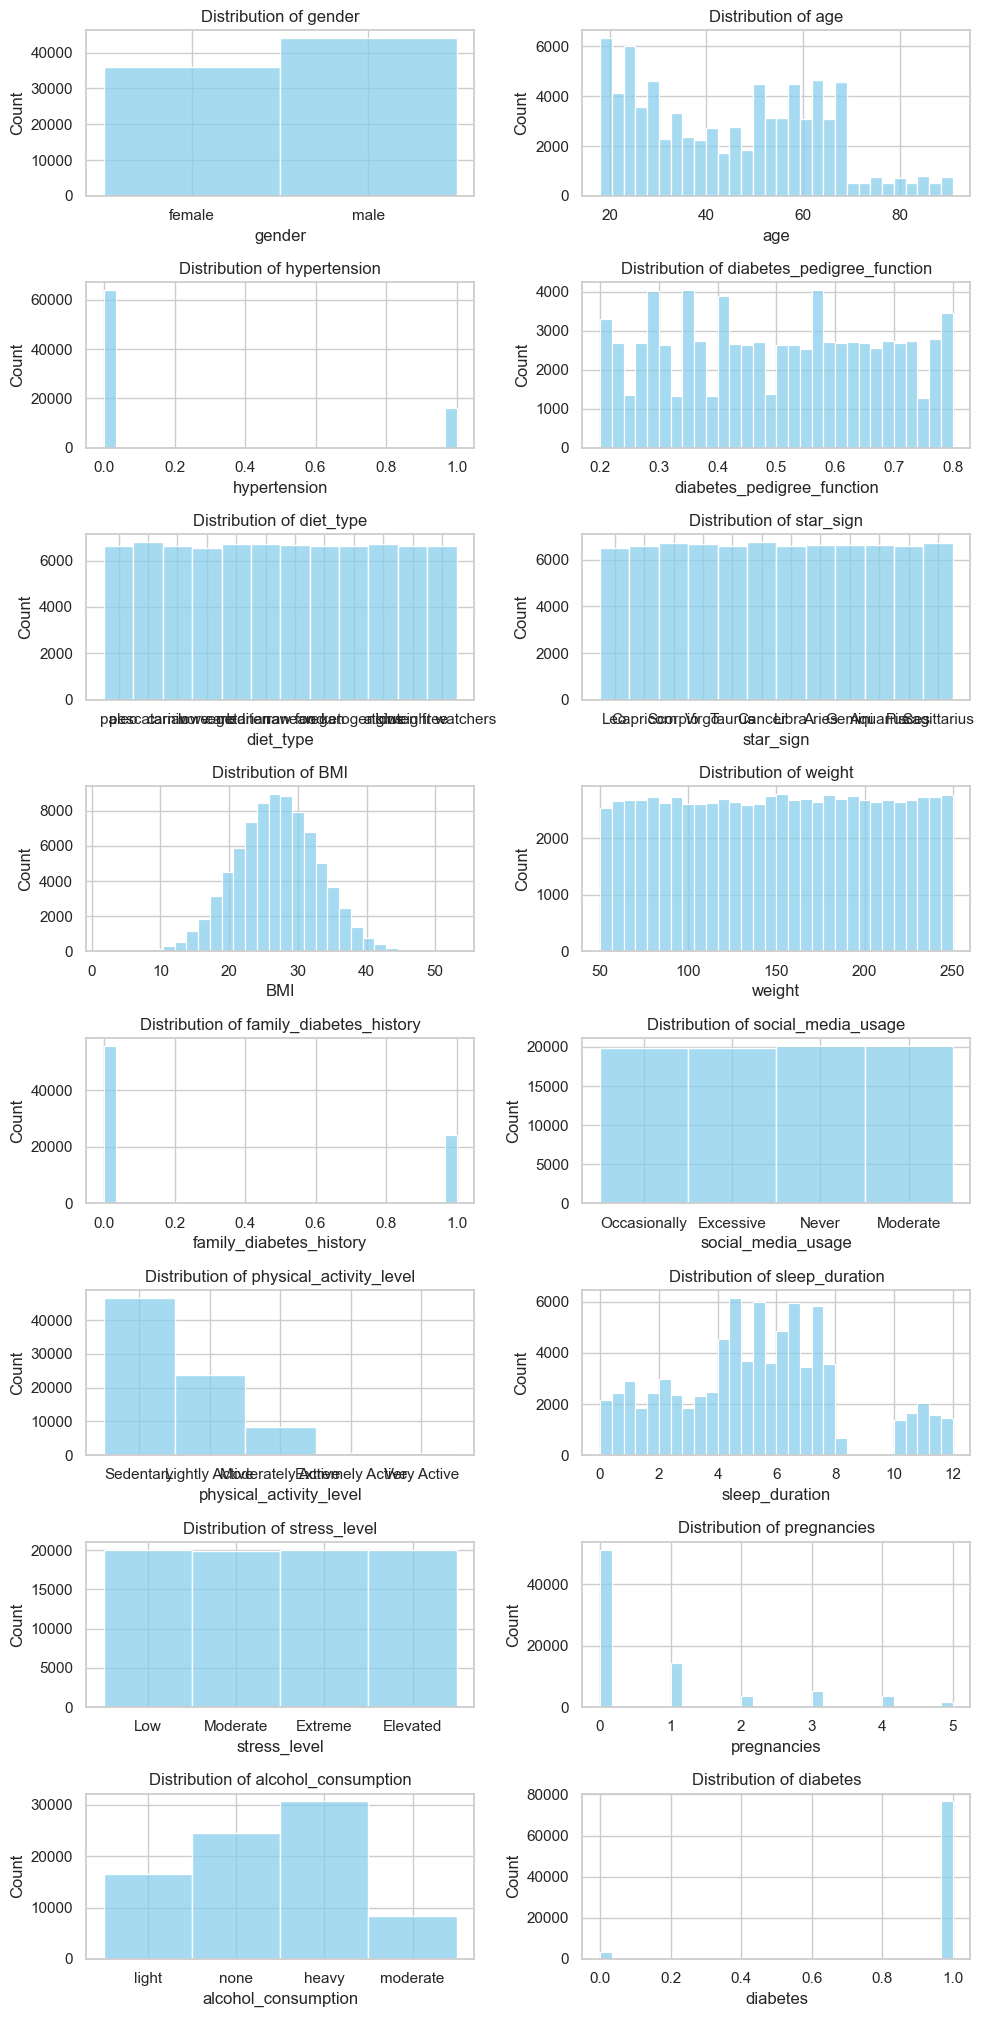

In [20]:
plt.figure(figsize = (10,40))
columns = df.columns

for i, col in enumerate(columns, 1):
    plt.subplot(len(columns), 2, i)
    sns.histplot(df[col].dropna(),bins=30, color='skyblue')

    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()
    


### Handling missing data

In [26]:
df.columns

Index(['gender', 'age', 'hypertension', 'diabetes_pedigree_function',
       'diet_type', 'star_sign', 'BMI', 'weight', 'family_diabetes_history',
       'social_media_usage', 'physical_activity_level', 'sleep_duration',
       'stress_level', 'pregnancies', 'alcohol_consumption', 'diabetes'],
      dtype='object')

In [28]:
df_processed = df.dropna(subset = ["diabetes"])

In [36]:
len(df_processed.drop_duplicates())

80242

In [33]:
# check for na values
for column in df_processed.columns:
    print(df_processed[column].isnull().value_counts())

gender
False    64068
True     16174
Name: count, dtype: int64
age
False    64265
True     15977
Name: count, dtype: int64
hypertension
False    64333
True     15909
Name: count, dtype: int64
diabetes_pedigree_function
False    64270
True     15972
Name: count, dtype: int64
diet_type
False    64163
True     16079
Name: count, dtype: int64
star_sign
False    63962
True     16280
Name: count, dtype: int64
BMI
False    64080
True     16162
Name: count, dtype: int64
weight
False    64313
True     15929
Name: count, dtype: int64
family_diabetes_history
False    64029
True     16213
Name: count, dtype: int64
social_media_usage
False    64112
True     16130
Name: count, dtype: int64
physical_activity_level
False    64175
True     16067
Name: count, dtype: int64
sleep_duration
False    64259
True     15983
Name: count, dtype: int64
stress_level
False    64291
True     15951
Name: count, dtype: int64
pregnancies
False    64237
True     16005
Name: count, dtype: int64
alcohol_consumption
False  

In [46]:
df_processed = df_processed.drop("star_sign",axis=1)

In [47]:
categorical_cols = df_processed.select_dtypes(include=['object', 'category']).columns
numerical_cols = df_processed.select_dtypes(include=['number']).columns

In [49]:
df_dummies = pd.get_dummies(df_processed[categorical_cols], drop_first = True)

In [50]:
df_final = pd.concat([df_processed[numerical_cols], df_dummies], axis=1)

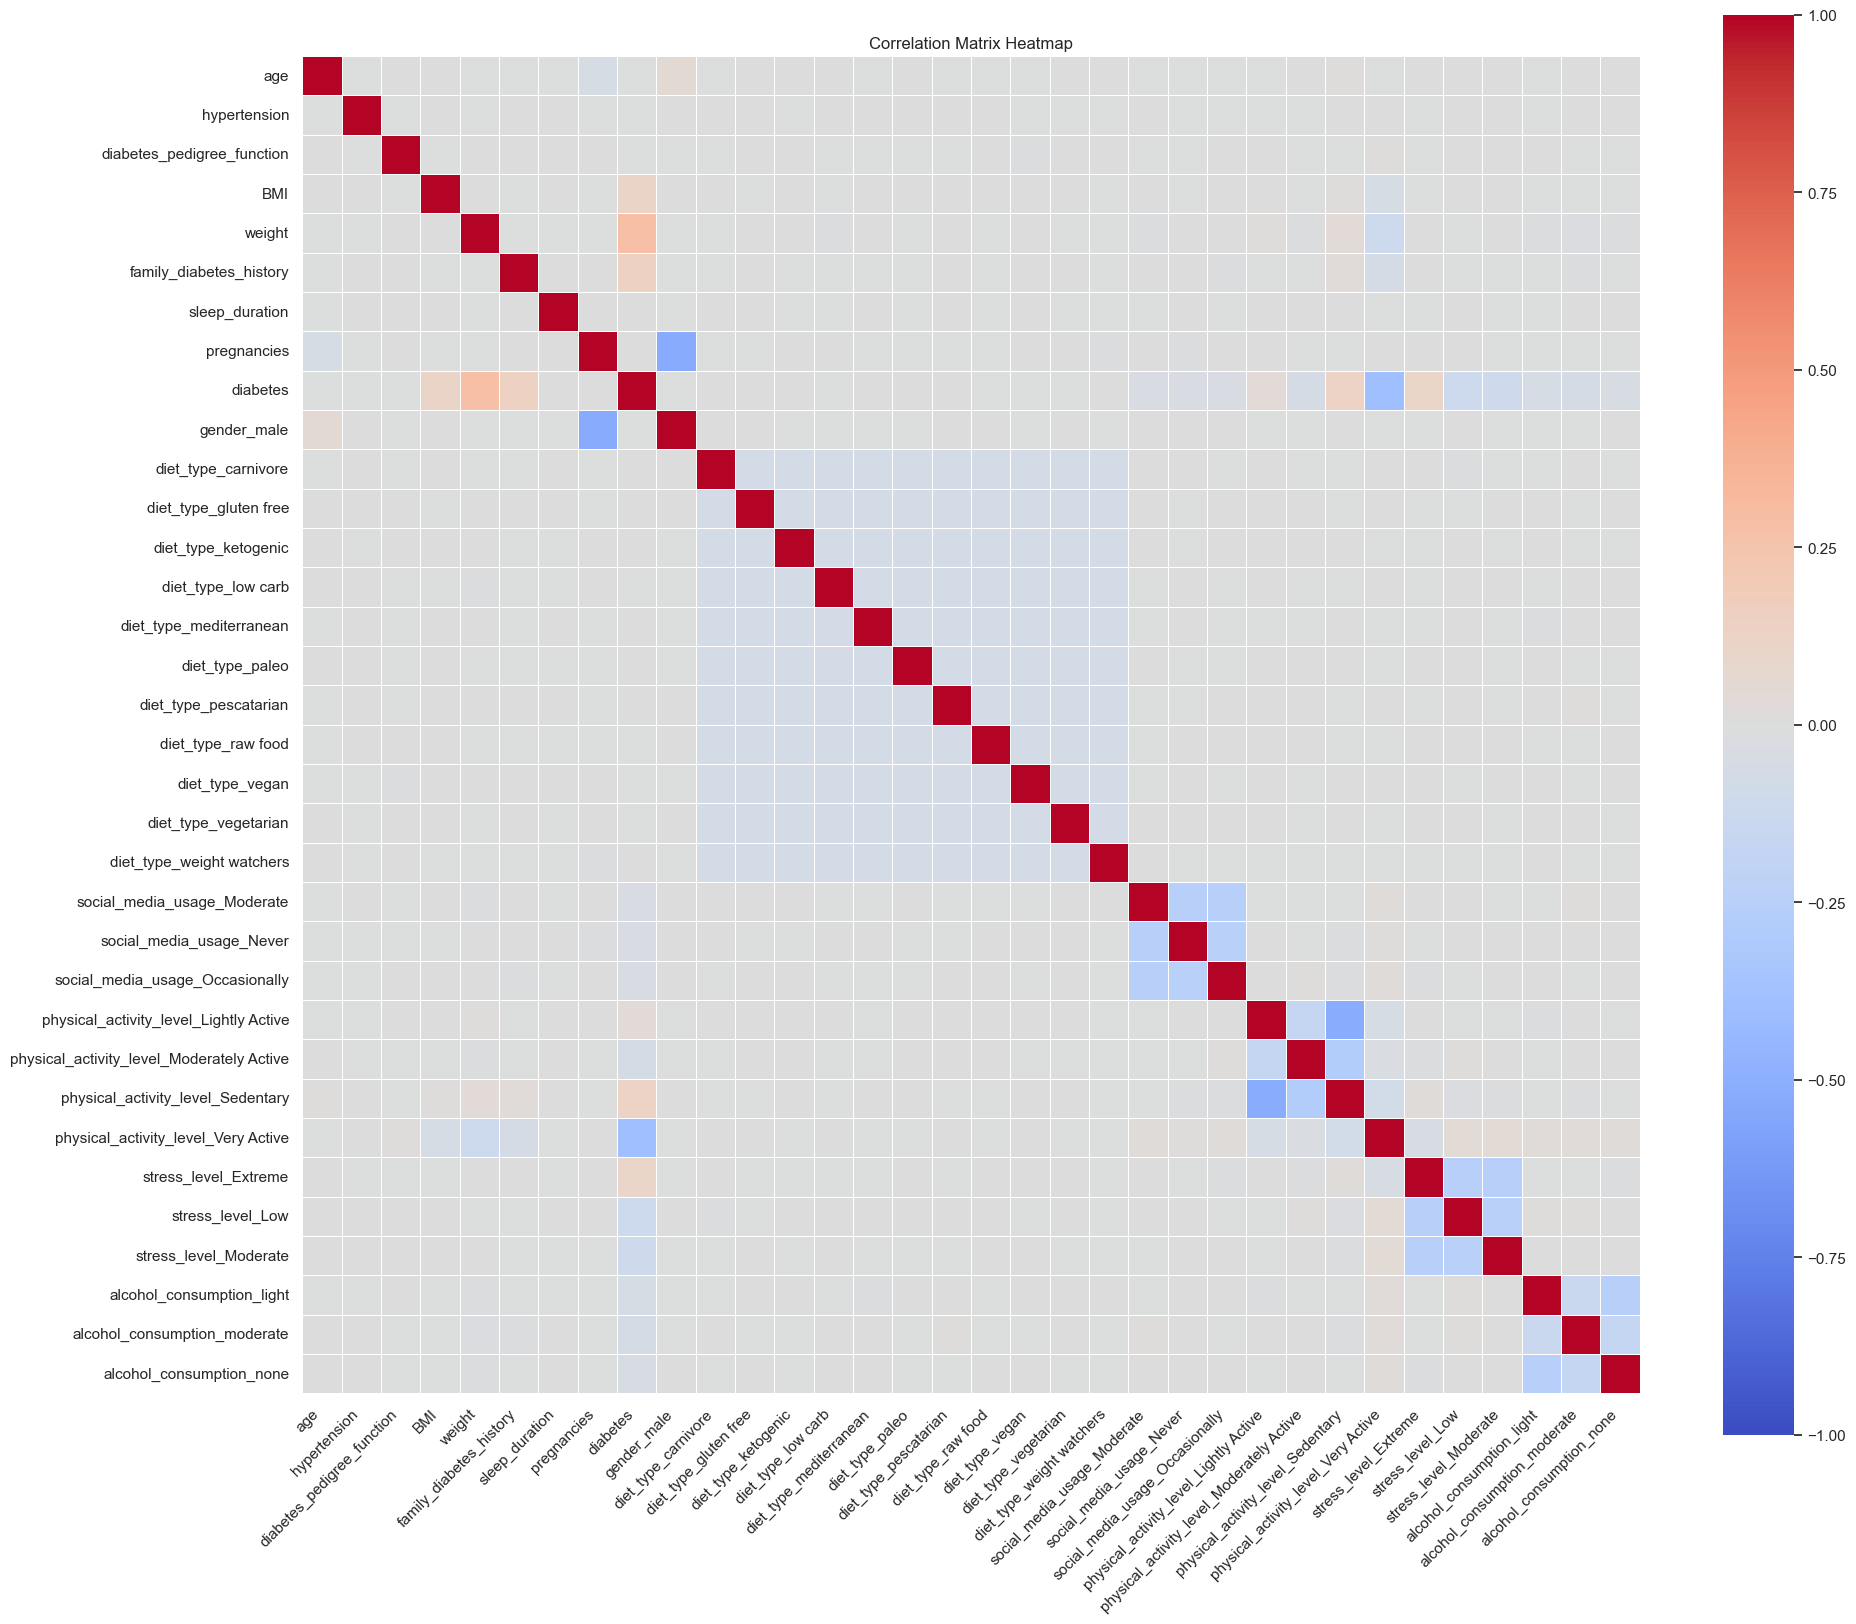

In [51]:
correlation_matrix = df_final.corr()

# Step 2: Set up the matplotlib figure
plt.figure(figsize=(20, 20))

# Step 3: Use seaborn to create a heatmap
sns.heatmap(
    correlation_matrix, 
    # annot=True,        # Show correlation coefficients
    # fmt='.2f',         # Format to 2 decimal places
    cmap='coolwarm',   # Color map
    vmin=-1, vmax=1,   # Set limits from -1 to 1
    square=True,       # Keep cells square-shaped
    linewidths=0.5,    # Add lines between cells
    cbar_kws={"shrink": 0.75}  # Adjust color bar size
)

# Step 4: Add titles and labels
plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Step 5: Show the plot
plt.show()

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [57]:
df_dropna = df_final.dropna()

In [58]:
X = df_dropna.drop("diabetes",axis = 1)
y = df_dropna["diabetes"]

R² Score: 0.30
Mean Absolute Error (MAE): 0.09
Root Mean Squared Error (RMSE): 0.17


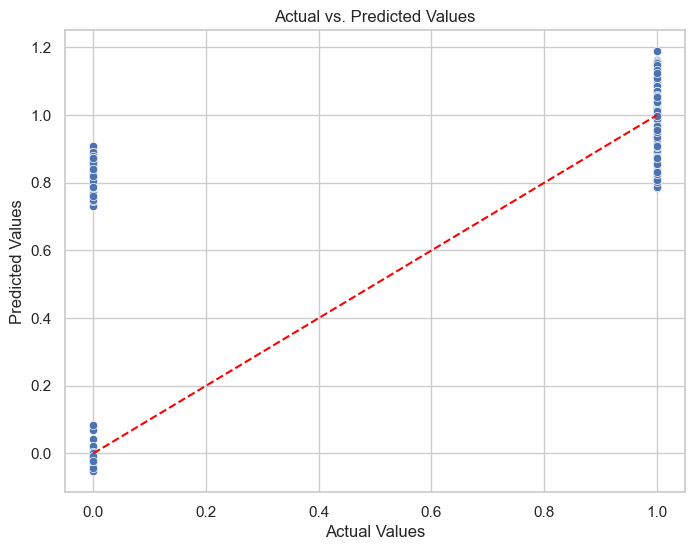

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'R² Score: {r2:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix



Accuracy: 0.99
Precision: 0.99
Recall: 1.00
F1 Score: 0.99
ROC AUC Score: 1.00

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.79      0.84       171
         1.0       0.99      1.00      0.99      3897

    accuracy                           0.99      4068
   macro avg       0.94      0.89      0.92      4068
weighted avg       0.99      0.99      0.99      4068



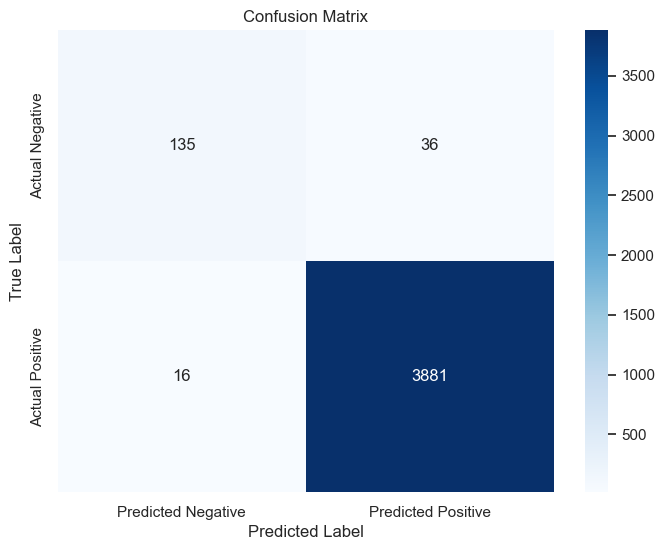

In [63]:
model = HistGradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred, zero_division=1)
f1 = f1_score(y_test, y_pred, zero_division=1)
roc_auc = roc_auc_score(y_test, y_proba)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC Score: {roc_auc:.2f}')

# Detailed Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Feature Importance Plot (Optional)
if hasattr(model, 'feature_importances_'):
    feature_importances = pd.Series(model.feature_importances_, index=X.columns)
    top_features = feature_importances.sort_values(ascending=False).head(10)
    plt.figure(figsize=(10, 6))
    top_features.plot(kind='barh')
    plt.title('Top 10 Feature Importances')
    plt.gca().invert_yaxis()
    plt.show()

In [65]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

mice_imputer = IterativeImputer(random_state=42)
df_imputed = mice_imputer.fit_transform(df_final)

In [67]:
df_test = pd.DataFrame(df_imputed, columns=df_final.columns)

In [68]:
df_test

,age,hypertension,diabetes_pedigree_function,BMI,weight,family_diabetes_history,sleep_duration,pregnancies,diabetes,gender_male,...,physical_activity_level_Lightly Active,physical_activity_level_Moderately Active,physical_activity_level_Sedentary,physical_activity_level_Very Active,stress_level_Extreme,stress_level_Low,stress_level_Moderate,alcohol_consumption_light,alcohol_consumption_moderate,alcohol_consumption_none
0,44.455601,0.200557,0.370000,27.347230,197.700000,0.308207,1.5,1.327849,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,59.000000,0.000000,0.730000,17.100000,156.500000,0.000000,5.4,0.000000,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,31.000000,0.202222,0.502428,22.500000,137.800000,0.344197,7.6,0.000000,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,64.000000,0.000000,0.550000,27.032032,179.700000,0.286874,7.8,0.000000,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,50.000000,0.000000,0.430000,27.305112,157.491318,0.000000,4.7,0.000000,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80237,24.000000,0.203722,0.290000,18.900000,56.000000,0.000000,2.6,0.000000,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
80238,53.000000,1.000000,0.640000,28.400000,140.800000,0.319936,7.5,0.000000,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
80239,61.000000,0.000000,0.340000,27.199626,156.767042,0.311038,2.8,0.000000,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
80240,46.294065,0.000000,0.710000,28.800000,123.600000,0.000000,0.4,0.000000,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [70]:
X_processed = df_test.drop("diabetes",axis=1)
y_processed = df_test["diabetes"]

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

Accuracy: 0.96
Precision: 0.96
Recall: 1.00
F1 Score: 0.98
ROC AUC Score: 1.00

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.20      0.34      1113
         1.0       0.96      1.00      0.98     22960

    accuracy                           0.96     24073
   macro avg       0.98      0.60      0.66     24073
weighted avg       0.96      0.96      0.95     24073



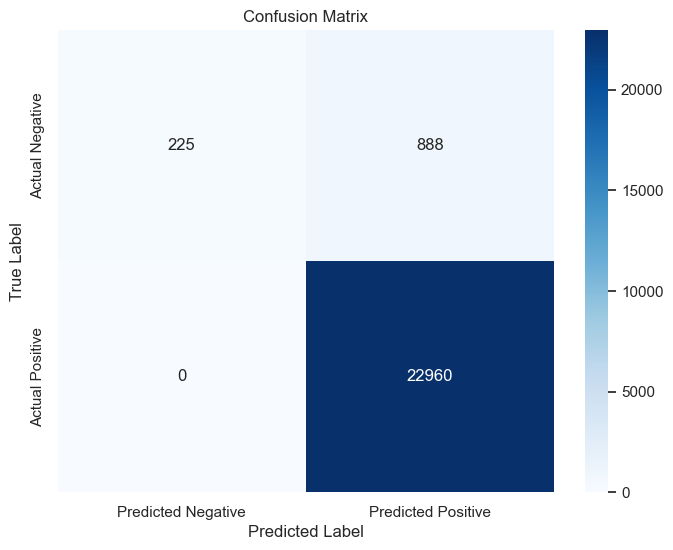

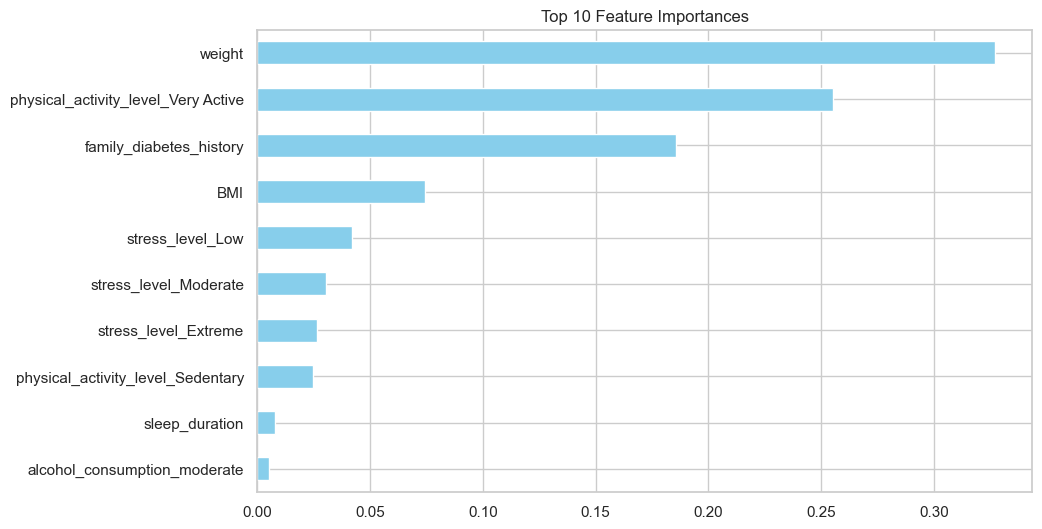

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, y_processed, test_size=0.3, random_state=42)

# Step 5: Initialize and Train the Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth= 5)
model.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

# Step 7: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred, zero_division=1)
f1 = f1_score(y_test, y_pred, zero_division=1)
roc_auc = roc_auc_score(y_test, y_proba)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC Score: {roc_auc:.2f}')

# Detailed Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Step 8: Feature Importance Plot (Optional)
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = feature_importances.sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_features.plot(kind='barh', color='skyblue')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [76]:
from sklearn.tree import plot_tree


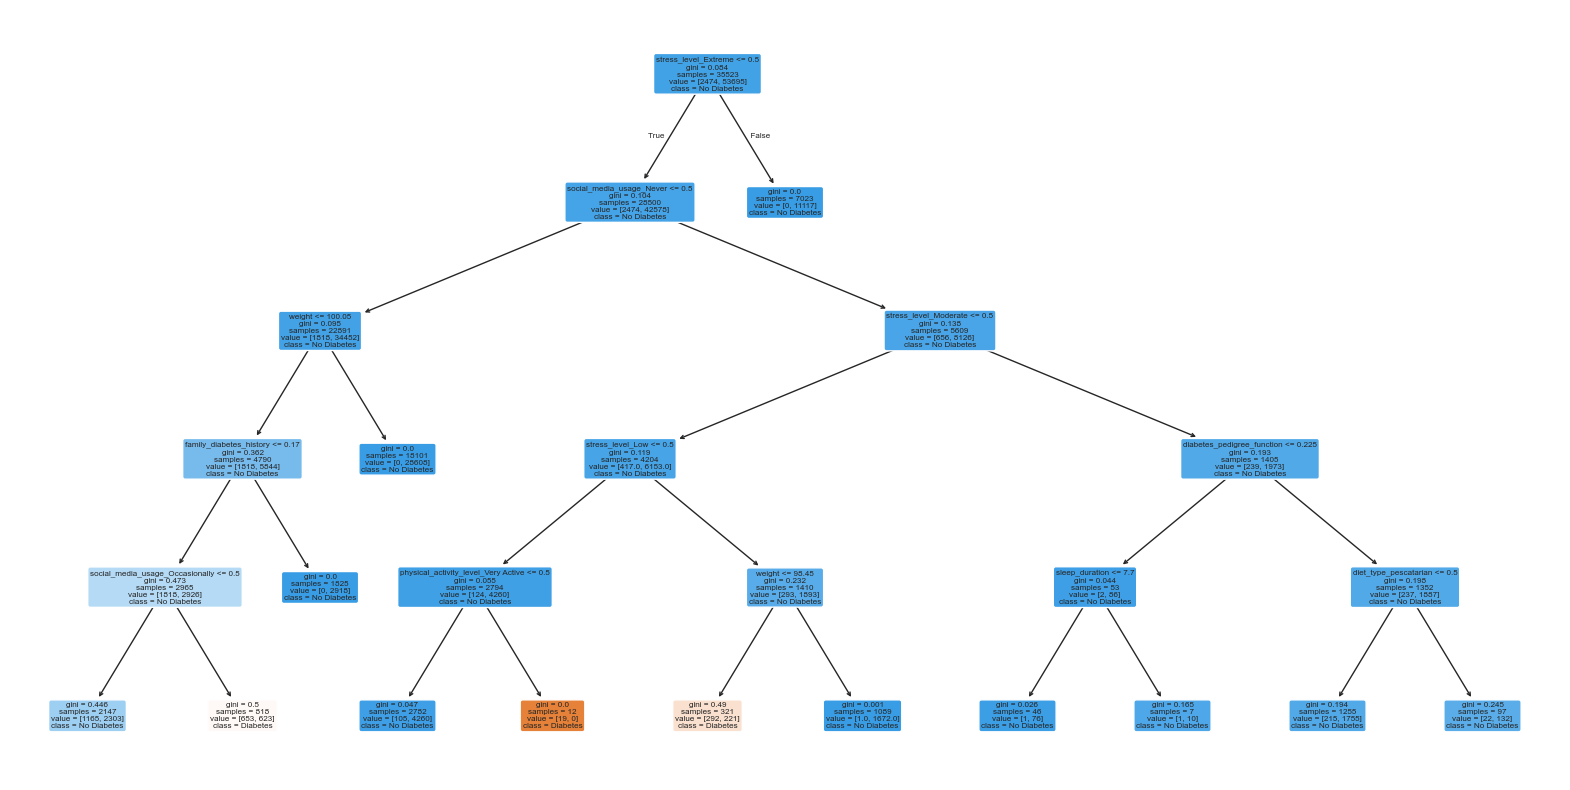

In [82]:
# Plot a single tree from the Random Forest
plt.figure(figsize=(20, 10))  # Adjust the size as needed
plot_tree(model.estimators_[0], filled=True, feature_names=X_processed.columns, class_names=["Diabetes","No Diabetes"], rounded=True)
plt.show()